In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
#for threshold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
#!pip uninstall scipy numpy


In [ ]:
#!pip install --upgrade scipy numpy

In [4]:
#!pip install --upgrade numpy scipy

In [5]:
credit_data= pd.read_csv(r'E:\credit\fraud\creditcard.csv')

In [6]:

credit_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
#data information
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
print(credit_data.describe(include='all'))

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [10]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
#no.of missing value in each column
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
# print shape and size of datasets
print("Shape of Credit_card data:",credit_data.shape)
print("Size of credit_card data: ",credit_data.size)

Shape of Credit_card data: (284807, 31)
Size of credit_card data:  8829017


In [13]:
# count class  0 represent no Fraud and 1 represent Fraud
credit_data['Class'].value_counts()  

0    284315
1       492
Name: Class, dtype: int64

In [14]:
#SEPARATING data for analysis
credit_data.shape

(284807, 31)

In [15]:
legal = credit_data[credit_data['Class'] == 0]
fraud = credit_data[credit_data['Class'] == 1]
fraud_count = fraud.shape[0]

In [16]:
print("Count of fraud:", fraud_count)

Count of fraud: 492


In [17]:
print (fraud.shape)

(492, 31)


In [18]:
legal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
#compare the value for both transcation
credit_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


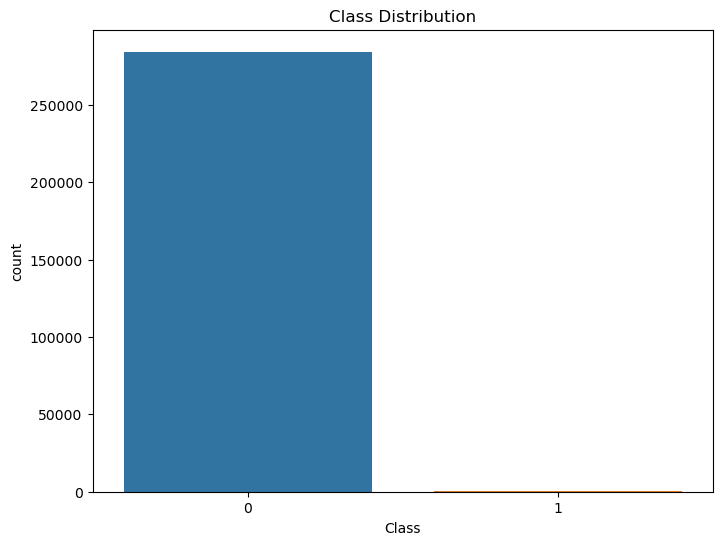

In [21]:
# visualize of distribution (data is imbalance)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_data)
plt.title('Class Distribution')
plt.show()

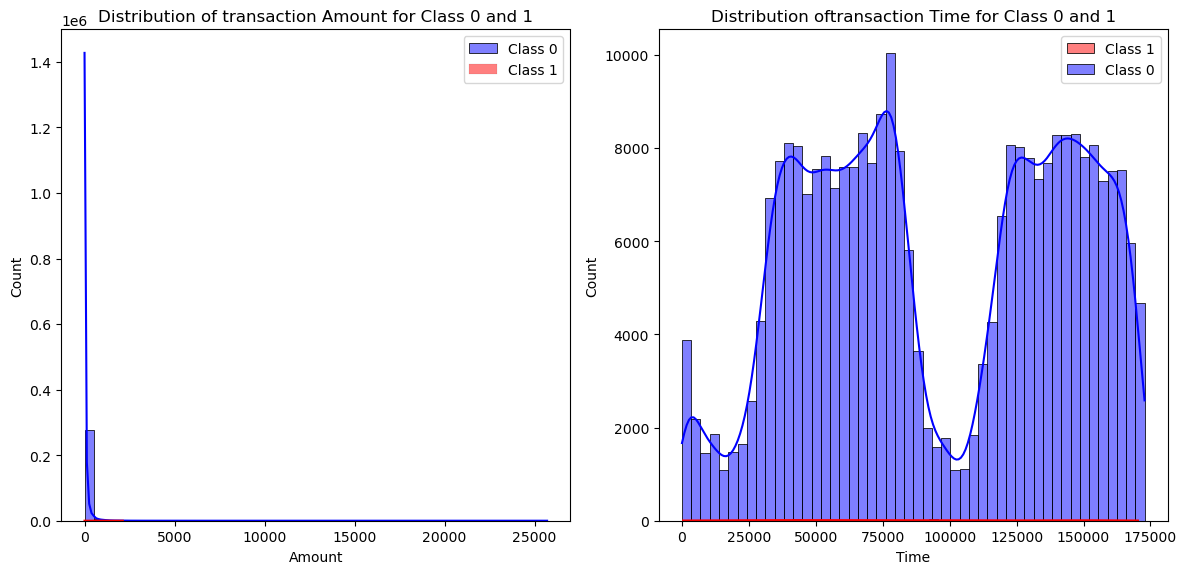

In [22]:
# Visualize the distribution of Amount and Time features for both classes

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(credit_data[credit_data['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Class 0')
sns.histplot(credit_data[credit_data['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Class 1')
plt.title('Distribution of transaction Amount for Class 0 and 1')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(credit_data[credit_data['Class'] == 1]['Time'], bins=50, kde=True, color='red', label='Class 1')
sns.histplot(credit_data[credit_data['Class'] == 0]['Time'], bins=50, kde=True, color='blue', label='Class 0')
plt.title('Distribution oftransaction Time for Class 0 and 1')
plt.legend()
plt.tight_layout()
plt.show()

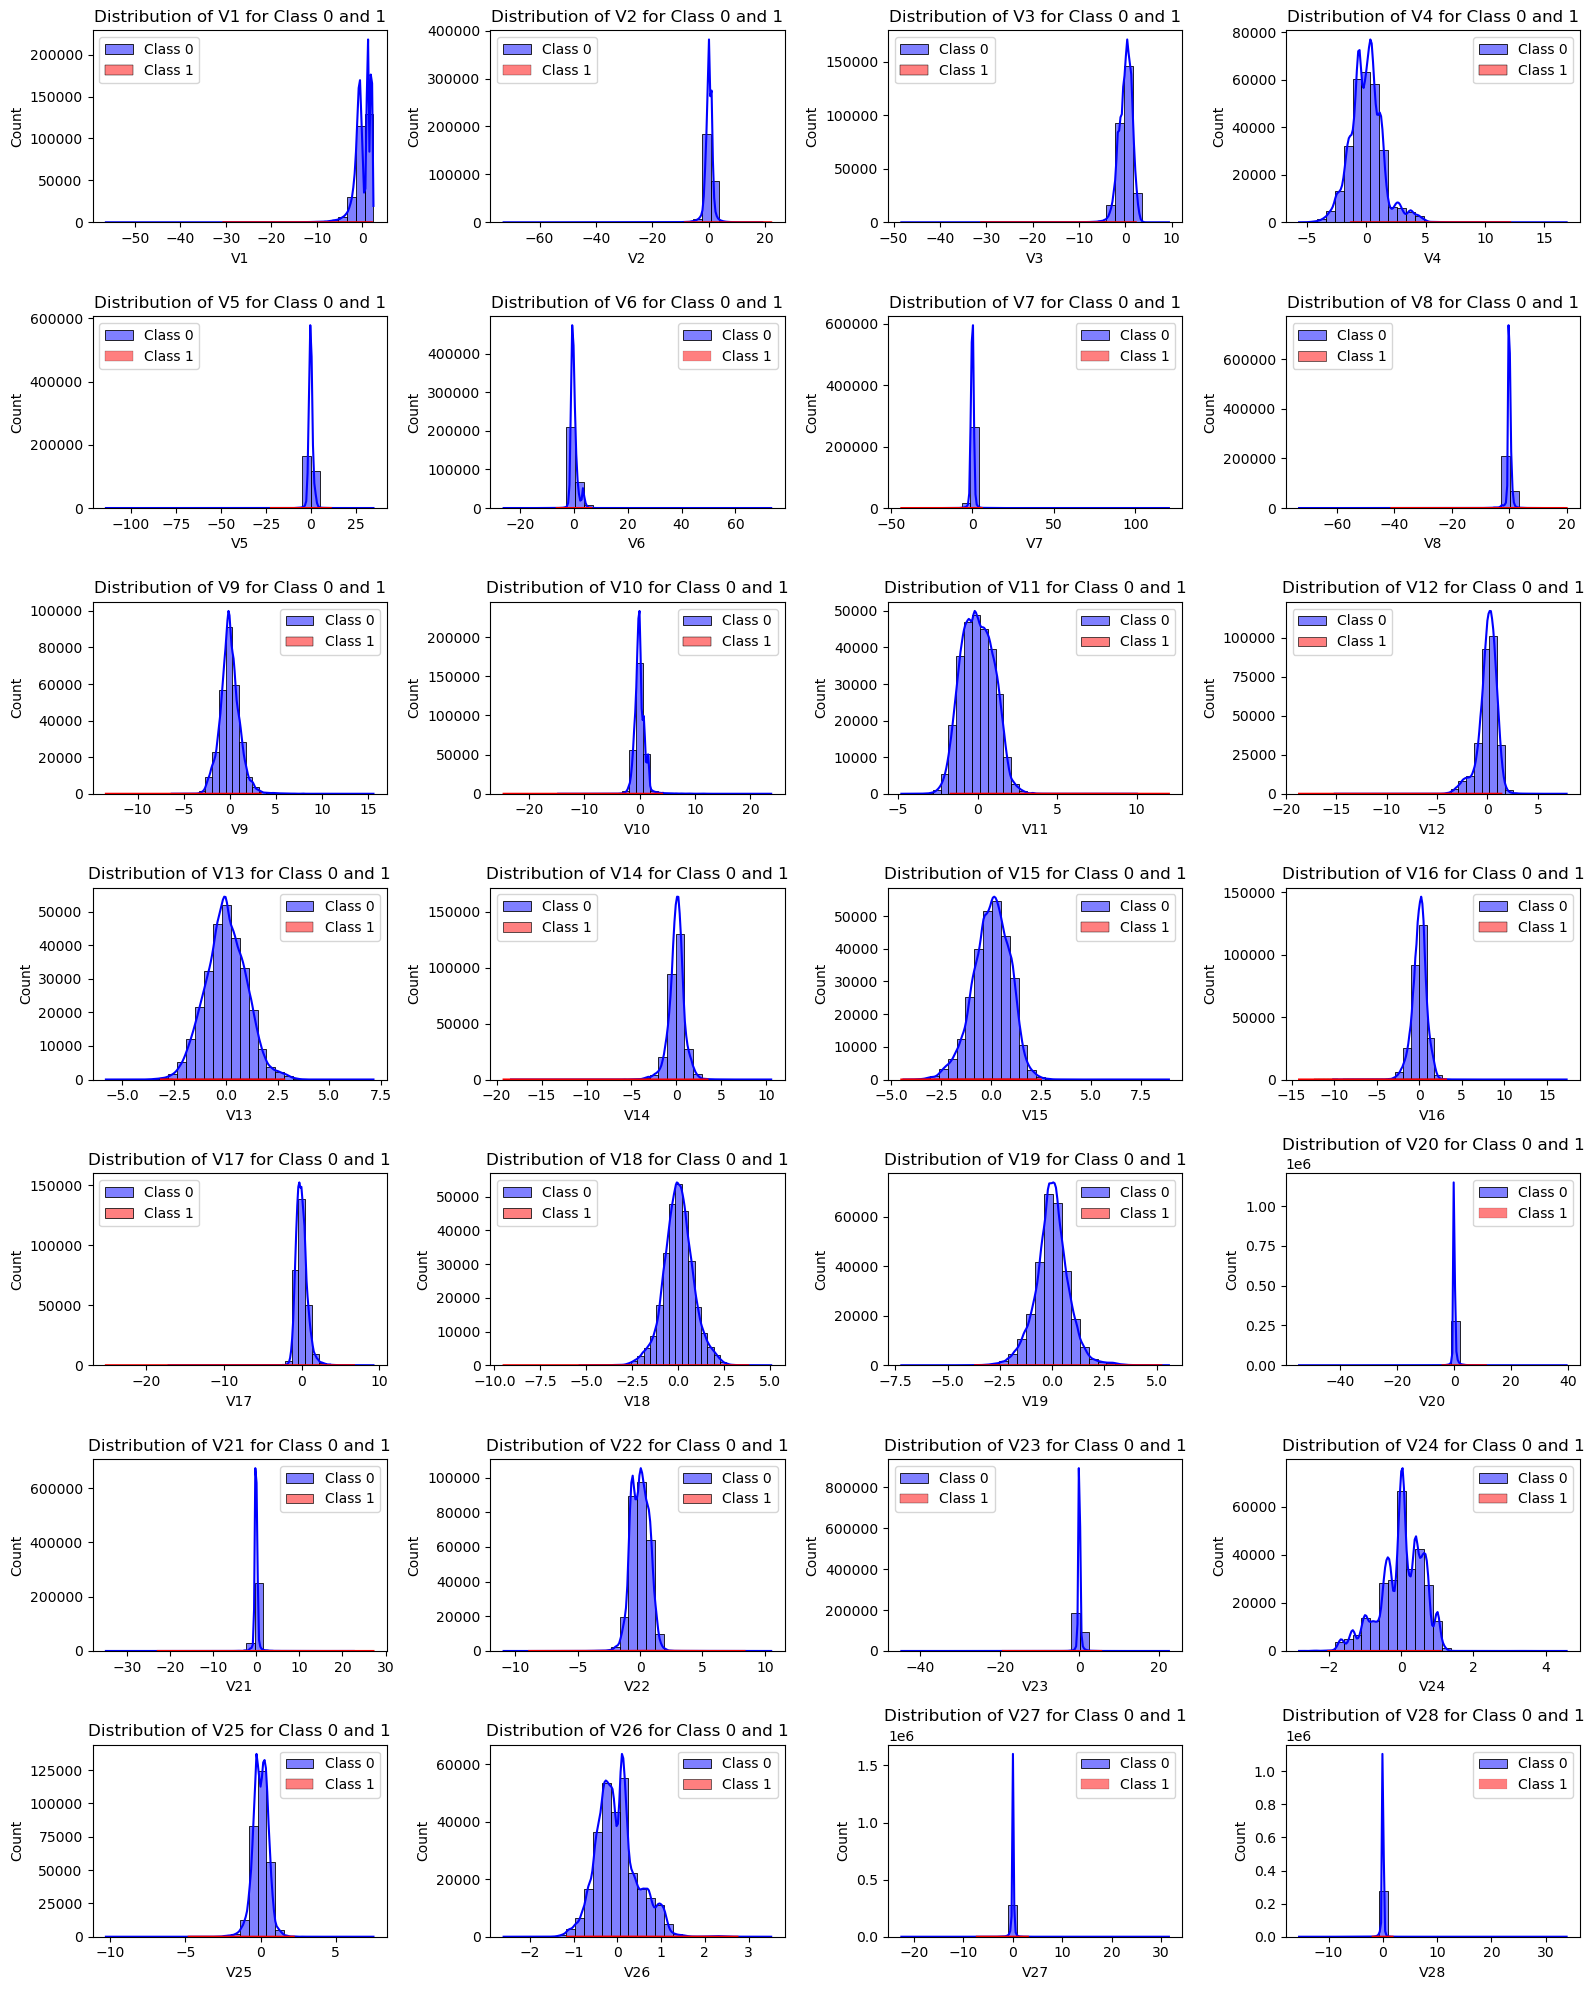

In [23]:
# Visualize the distribution of numerical features for both classes

num_features = credit_data.drop(['Time', 'Amount', 'Class'], axis=1).columns

plt.figure(figsize=(16, 20))
for i, feature in enumerate(num_features, 1):
    plt.subplot(7, 4, i)
    sns.histplot(credit_data[credit_data['Class'] == 0][feature], bins=30, kde=True, color='blue', label='Class 0')
    sns.histplot(credit_data[credit_data['Class'] == 1][feature], bins=30, kde=True, color='red', label='Class 1')
    plt.title(f'Distribution of {feature} for Class 0 and 1')
    plt.legend()

plt.tight_layout()
plt.show()

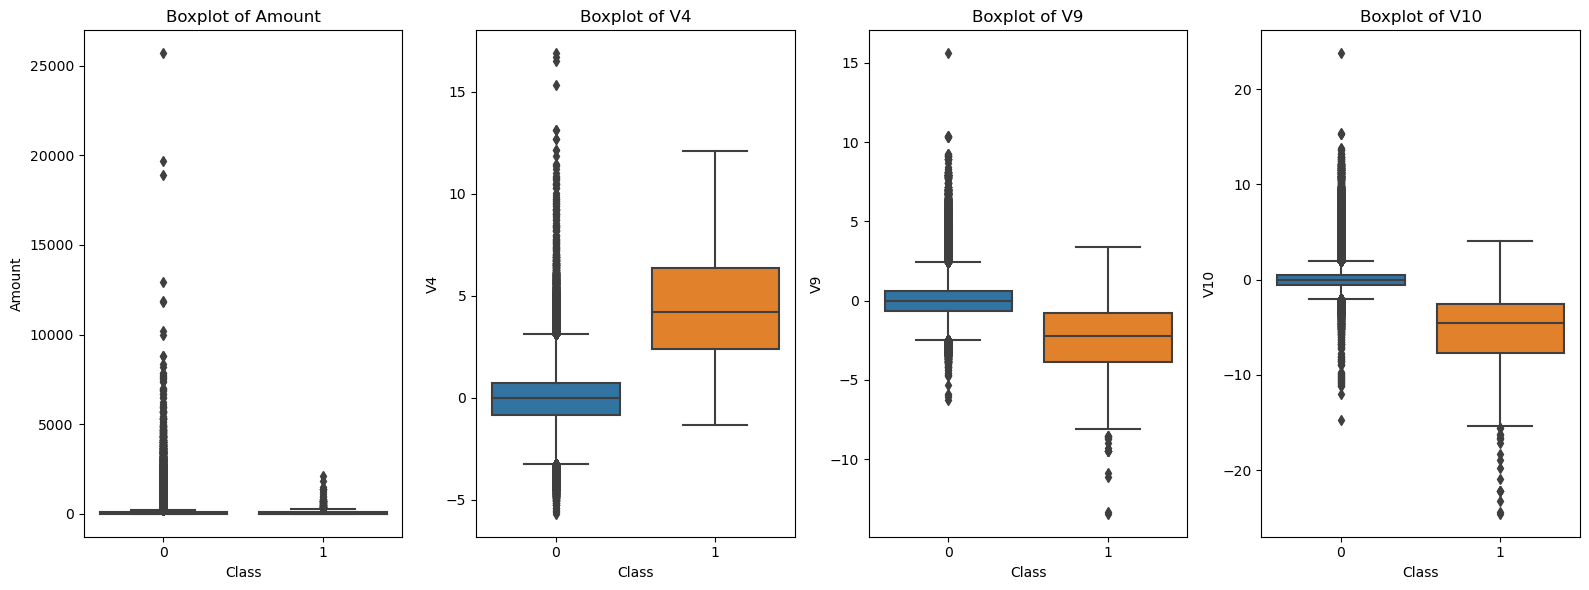

In [24]:
plt.figure(figsize=(16, 6))
for i, feature in enumerate(['Amount', 'V4', 'V9', 'V10'], 1):
    plt.subplot(1, 4, i)
    sns.boxplot(x='Class', y=feature, data=credit_data)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Visualize pairplots for a subset of features

subset_features = ['Time', 'Amount', 'V1', 'V2', 'V3', 'V4']
sns.pairplot(credit_data[subset_features + ['Class']], hue='Class', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [ ]:
# Visualize correlation matrix
corr_matrix = credit_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Split the data into features (X) and target variable (y)
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
X_train.shape,y_train.shape

In [ ]:
# Standardize(preprocessor and normalize) the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#!pip uninstall scikit-learn --yes


In [ ]:
#!pip uninstall scikit-learn

In [ ]:
#pip install --upgrade scikit-learn

In [ ]:
#pip install --upgrade numpy scipy

In [ ]:
#pip install imbalanced-learn

In [ ]:
import sklearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
# Handle class imbalance using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [ ]:
#build random forest classifier
model= LogisticRegression(random_state=42)
model.fit(X_train_resampled,y_train_resampled)

In [ ]:
#make prediction
y_pred=model.predict(X_test)
y_pred

In [ ]:
# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc}")

In [ ]:
# Plotting the ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
sns.heatmap(cf_matrix, annot=True)

In [ ]:
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled,y_train_resampled)

In [ ]:
y_pred=model.predict(X_test)
y_pred

In [ ]:
print(f"The Classification Report for my model is {classification_report(y_test,y_pred)}")

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

In [ ]:
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

y_pred_proba_rf = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_rf)
auc = roc_auc_score(y_test, y_pred_proba_rf)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
print(cf_matrix)

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC AUC Score: {roc_auc}")

In [ ]:
# Plotting the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#optimal_thres_lr = 0.5  # Replace with your optimal threshold for Logistic Regression
#optimal_thres_rf = 0.5
opt={'Logistic Regression':optimal_thres_lr,'RandomForest Classification':optimal_thres_rf}
for model, thresh in opt.items():
    if model == 'LogisticRegression':
        model = logistic_regression
    elif rf =='RandomForest Classification':
        rf = random_forest_model
    if hasattr(model, 'predict_proba'):
        y_test_pred_prob = model.predict(X_test)[:, 1]
    else: 
        y_test_pred_prob = rf.predict(X_test)

    
    y_test_pred_adj = rf.predict_proba(X_test)[:, 1]
    y_test_pred_adj1 = (y_test_pred_adj >= thresh).astype(int)
    ac_score = accuracy_score(y_test, y_test_pred_adj1)
    ROC_AC = roc_auc_score(y_test, y_test_pred_adj1)
    print("_" * 50)
    print(f"Model: {model}")
    print(f"Threshold: {thresh}")
    print(f"Accuracy Score: {ac_score}")
    print(f"ROC Accuracy Score: {ROC_AC}")
    print("_" * 50)

In [ ]:
# plot roc curves(The ROC curves compare the performance of Logistic Regression, K-Neighbors (KNN), and a Random Classifier.)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='-',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='dashdot',color='blue', label='RANDOMFOREST')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [ ]:

credit_data['Class'].value_counts()

In [ ]:
#Data is not balanced if you see 0 legit transactions are 284315, where as fraud transations are 492
#so we are using the Resampling Technique
#Under-sampling the Majority Class:
credit_0 = credit_data[credit_data['Class'] == 0].sample(n=492, random_state=42)
credit_1= credit_data[credit_data['Class'] == 1].sample(n=492, random_state=42)
print(f' Fraud Shape{credit_1.shape}\n No Fraud shape{credit_0.shape}')

In [ ]:
credit_concat=pd.concat([credit_0,credit_1], ignore_index=True)

In [ ]:
credit_concat.shape

In [ ]:
#balance dataset train test split
X_blnc_dummy=credit_concat.drop('Class', axis=1)
y_blnc=credit_concat['Class']
print(X_blnc_dummy.shape,  '\n', y_blnc.shape)

In [ ]:
X_blnc=scaler.fit_transform(X_blnc_dummy)

In [ ]:
x_train_b, x_test_b, y_train_b, y_test_b=train_test_split(X_blnc,y_blnc, test_size=0.20, random_state=123)
print(f'x_train{x_train_b.shape}\n, x_test{x_test_b.shape}\n, y_train{y_train_b.shape}\n, y_test{y_test_b.shape}')

In [ ]:
bal_lr=LogisticRegression()
bal_lr.fit(x_train_b,y_train_b)
bal_pred_train=bal_lr.predict(x_train_b)
bal_pred_test=bal_lr.predict(x_test_b)

In [ ]:
#balance dataser logisticregression
bal_cl_report_train=classification_report(y_train_b,bal_pred_train)
print(bal_cl_report_train)
bal_cl_report_test=classification_report(y_test_b,bal_pred_test)
print(bal_cl_report_test)

In [ ]:
conf_matrix=confusion_matrix(y_train_b,bal_pred_train)

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x_train_b,y_train_b)
rfc_bal_pred_train=bal_lr.predict(x_train_b)
rfc_bal_pred_test=bal_lr.predict(x_test_b)

In [ ]:
rfc_bal_cl_report_train=classification_report(y_train_b,rfc_bal_pred_train)
print(rfc_bal_cl_report_train)
rfc_bal_cl_report_test=classification_report(y_test_b,rfc_bal_pred_test)
print(rfc_bal_cl_report_test)

In [ ]:
conf_matrix=confusion_matrix(y_test_b,bal_pred_test)

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()